In [47]:
from pathlib import Path
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
csv_path = Path('/Users/prateekM/Desktop/1_Projects/Project Chitti/data/text extractions/final_consolidated.csv')

In [9]:
df = pd.read_csv(csv_path)
df.drop(df.columns[0], axis=1, inplace=True)

In [10]:
df.sample(2)

,pageNumber_pypdf,pdfId_pypdf,pageContent_pypdf,extractionTimeSeconds_pypdf,pageContent_pymupdf,extractionTimeSeconds_pymupdf,pageContent_pdfminer,extractionTimeSeconds_pdfminer,pdfId,text,pypdf_bleu,pypdf_jaccard,pypdf_levenshtein,pymupdf_bleu,pymupdf_jaccard,pymupdf_levenshtein,pdfminer_bleu,pdfminer_jaccard,pdfminer_levenshtein
50,19.0,matplotlib_1-21_pdf.pdf ~ 19,"Matplotlib, Release 2.0.2\n0.0 0.5 1.0 1.5 2.0...",0.007328,"Matplotlib, Release 2.0.2\n0.0\n0.5\n1.0\n1.5\...",0.001442,"Matplotlib, Release 2.0.2\n0.0 0.5 1.0 1.5 2.0...",0.006677,matplotlib_1-21_pdf.pdf ~ 19,\nCHAPTER THREE\nTUTORIALS\n 3.1 Introductory ...,0.011171,0.033333,1047,0.011118,0.033113,1048,0.011171,0.033333,1047
46,15.0,matplotlib_1-21_pdf.pdf ~ 15,"Matplotlib, Release 2.0.2\ntk 8.3 or later, no...",0.006657,"Matplotlib, Release 2.0.2\ntk 8.3 or later, no...",0.001820,"Matplotlib, Release 2.0.2\ntk 8.3 or later, no...",0.008113,matplotlib_1-21_pdf.pdf ~ 15,\nIf you have installed prerequisites to nonst...,0.017363,0.159763,1864,0.017410,0.159763,1862,0.017363,0.159763,1864


# Analysis of Extraction Times

In [11]:
libraries: list = ['pypdf', 'pymupdf', 'pdfminer']
time_col_prefix: str = 'extractionTimeSeconds_'
all_time_cols = [time_col_prefix + lib for lib in libraries]

In [12]:
desc = df[all_time_cols].describe()
desc

,extractionTimeSeconds_pypdf,extractionTimeSeconds_pymupdf,extractionTimeSeconds_pdfminer
count,60.000000,60.000000,60.000000
mean,0.007213,0.001601,0.007199
std,0.011471,0.001244,0.011735
min,0.000051,0.000046,0.000048
25%,0.003236,0.000785,0.003038
50%,0.005293,0.001221,0.004938
75%,0.007461,0.002287,0.007446
max,0.087429,0.005688,0.089203


## Check which page took the highest time

In [13]:
all_time_cols

['extractionTimeSeconds_pypdf',
 'extractionTimeSeconds_pymupdf',
 'extractionTimeSeconds_pdfminer']

In [14]:
df[df['extractionTimeSeconds_pypdf'] == desc.loc["max", "extractionTimeSeconds_pypdf"]]

,pageNumber_pypdf,pdfId_pypdf,pageContent_pypdf,extractionTimeSeconds_pypdf,pageContent_pymupdf,extractionTimeSeconds_pymupdf,pageContent_pdfminer,extractionTimeSeconds_pdfminer,pdfId,text,pypdf_bleu,pypdf_jaccard,pypdf_levenshtein,pymupdf_bleu,pymupdf_jaccard,pymupdf_levenshtein,pdfminer_bleu,pdfminer_jaccard,pdfminer_levenshtein
5,6.0,matplotlib_41-61_pdf.pdf ~ 6,"Matplotlib, Release 2.0.2\nGridSpec with Varyi...",0.087429,"Matplotlib, Release 2.0.2\nGridSpec with Varyi...",0.005688,"Matplotlib, Release 2.0.2\nGridSpec with Varyi...",0.089203,matplotlib_41-61_pdf.pdf ~ 6,"\nMatplotlib, Release 2.0.2\n GridSpec using S...",0.031318,0.108108,505,0.031318,0.108108,504,0.031318,0.108108,505


In [15]:
df[df['extractionTimeSeconds_pymupdf'] == desc.loc["max", "extractionTimeSeconds_pymupdf"]]

,pageNumber_pypdf,pdfId_pypdf,pageContent_pypdf,extractionTimeSeconds_pypdf,pageContent_pymupdf,extractionTimeSeconds_pymupdf,pageContent_pdfminer,extractionTimeSeconds_pdfminer,pdfId,text,pypdf_bleu,pypdf_jaccard,pypdf_levenshtein,pymupdf_bleu,pymupdf_jaccard,pymupdf_levenshtein,pdfminer_bleu,pdfminer_jaccard,pdfminer_levenshtein
5,6.0,matplotlib_41-61_pdf.pdf ~ 6,"Matplotlib, Release 2.0.2\nGridSpec with Varyi...",0.087429,"Matplotlib, Release 2.0.2\nGridSpec with Varyi...",0.005688,"Matplotlib, Release 2.0.2\nGridSpec with Varyi...",0.089203,matplotlib_41-61_pdf.pdf ~ 6,"\nMatplotlib, Release 2.0.2\n GridSpec using S...",0.031318,0.108108,505,0.031318,0.108108,504,0.031318,0.108108,505


In [16]:
df[df['extractionTimeSeconds_pdfminer'] == desc.loc["max", "extractionTimeSeconds_pdfminer"]]

,pageNumber_pypdf,pdfId_pypdf,pageContent_pypdf,extractionTimeSeconds_pypdf,pageContent_pymupdf,extractionTimeSeconds_pymupdf,pageContent_pdfminer,extractionTimeSeconds_pdfminer,pdfId,text,pypdf_bleu,pypdf_jaccard,pypdf_levenshtein,pymupdf_bleu,pymupdf_jaccard,pymupdf_levenshtein,pdfminer_bleu,pdfminer_jaccard,pdfminer_levenshtein
5,6.0,matplotlib_41-61_pdf.pdf ~ 6,"Matplotlib, Release 2.0.2\nGridSpec with Varyi...",0.087429,"Matplotlib, Release 2.0.2\nGridSpec with Varyi...",0.005688,"Matplotlib, Release 2.0.2\nGridSpec with Varyi...",0.089203,matplotlib_41-61_pdf.pdf ~ 6,"\nMatplotlib, Release 2.0.2\n GridSpec using S...",0.031318,0.108108,505,0.031318,0.108108,504,0.031318,0.108108,505


## Group by PDF name

In [17]:
df['pdfName'] = df['pdfId_pypdf'].str.split('~').apply(lambda x: x[0])
df.sample(2)

,pageNumber_pypdf,pdfId_pypdf,pageContent_pypdf,extractionTimeSeconds_pypdf,pageContent_pymupdf,extractionTimeSeconds_pymupdf,pageContent_pdfminer,extractionTimeSeconds_pdfminer,pdfId,text,pypdf_bleu,pypdf_jaccard,pypdf_levenshtein,pymupdf_bleu,pymupdf_jaccard,pymupdf_levenshtein,pdfminer_bleu,pdfminer_jaccard,pdfminer_levenshtein,pdfName
10,11.0,matplotlib_41-61_pdf.pdf ~ 11,"Matplotlib, Release 2.0.2\n0.0 0.5 1.0\nx-labe...",0.005978,"Matplotlib, Release 2.0.2\n0.0\n0.5\n1.0\nx-la...",0.000807,"Matplotlib, Release 2.0.2\n0.0 0.5 1.0\nx-labe...",0.004916,matplotlib_41-61_pdf.pdf ~ 11,"\nMatplotlib, Release 2.0.2\n 2.0\n1.5\n1.0...",0.097639,0.206897,280,0.097407,0.245614,277,0.097639,0.206897,280,matplotlib_41-61_pdf.pdf
43,12.0,matplotlib_1-21_pdf.pdf ~ 12,CHAPTER\nTWO\nINSTALLING\nThere are many diﬀer...,0.004558,CHAPTER\nTWO\nINSTALLING\nThere are many diﬀer...,0.001450,CHAPTER\nTWO\nINSTALLING\nThere are many diﬀer...,0.004615,matplotlib_1-21_pdf.pdf ~ 12,"\nMatplotlib, Release 2.0.2\n figure generatin...",0.004212,0.065934,1243,0.004212,0.065934,1243,0.004212,0.065934,1243,matplotlib_1-21_pdf.pdf


In [18]:
grouped_for_ext_time = df.groupby('pdfName').agg(
    {
        'extractionTimeSeconds_pypdf': 'sum',
        'extractionTimeSeconds_pymupdf': 'sum',
        'extractionTimeSeconds_pdfminer': 'sum'
    }
)

# General Plotting Function

In [19]:
import matplotlib.pyplot as plt

In [20]:
def plot_data(
    ax, 
    x,
    y,
    plot_type: str = 'line',
    label: str = None,
    color: str = None,
    marker: str = 'o',
    markersize: int = 3,
    linestyle: str = '-',
    align: str = 'center',
    alpha: float = 0.5,
    width: float = 0.4,
    size: int = 25,
    legend_loc = 'best',
) -> None:
    if plot_type == 'line':
        ax.plot(
            x,
            y,
            label=label,
            color=color,
            linestyle=linestyle,
            marker=marker,
            markersize=markersize
        )

    if plot_type == 'bar':
        ax.bar(x, y, label=label, color=color, alpha=alpha, align=align, width=width)

    if legend_loc:
        ax.legend(loc=legend_loc)

    ax.grid(True, linestyle='--', alpha=0.6)

# Extraction Times plotting

In [21]:
def plot_extraction_times(
    grouped_df: pd.DataFrame,
    libraries: list[str] = ['pypdf', 'pymupdf', 'pdfminer'],
    time_col_prefix: str = 'extractionTimeSeconds_',
    figsize: tuple[int, int] = (14, 8),
    colors: dict[str, str] = None,
    markers: dict[str, str] = None
) -> None:
    fig, ax = plt.subplots(figsize=figsize)

    default_colors = ['#4C72B0', '#F28E2B', '#55A868', '#8C564B', '#D62728']
    default_markers = ['o', 's', '^', 'D', 'v', 'p']

    if colors is None:
        colors = {
            i: default_colors[i % len(default_colors)]
            for i, lib in enumerate(libraries)
        }

    if markers is None:
        markers = {
            i: default_markers[i % len(default_markers)]
            for i, lib in enumerate(libraries)
        }

    for i, library in enumerate(libraries):
        column = f'{time_col_prefix}{library}'
        plot_data(
            ax, 
            grouped_df.index,
            grouped_df[column],
            plot_type='line',
            label=library,
            color=colors[i],
            marker=markers[i]
        )

    ax.set_title('Time taken for each PDF extraction', fontsize=16)
    ax.set_ylabel('Time taken (s.)', fontsize=14)
    ax.tick_params(axis='x', rotation=60)

    plt.tight_layout()
    plt.show()

    return fig, ax

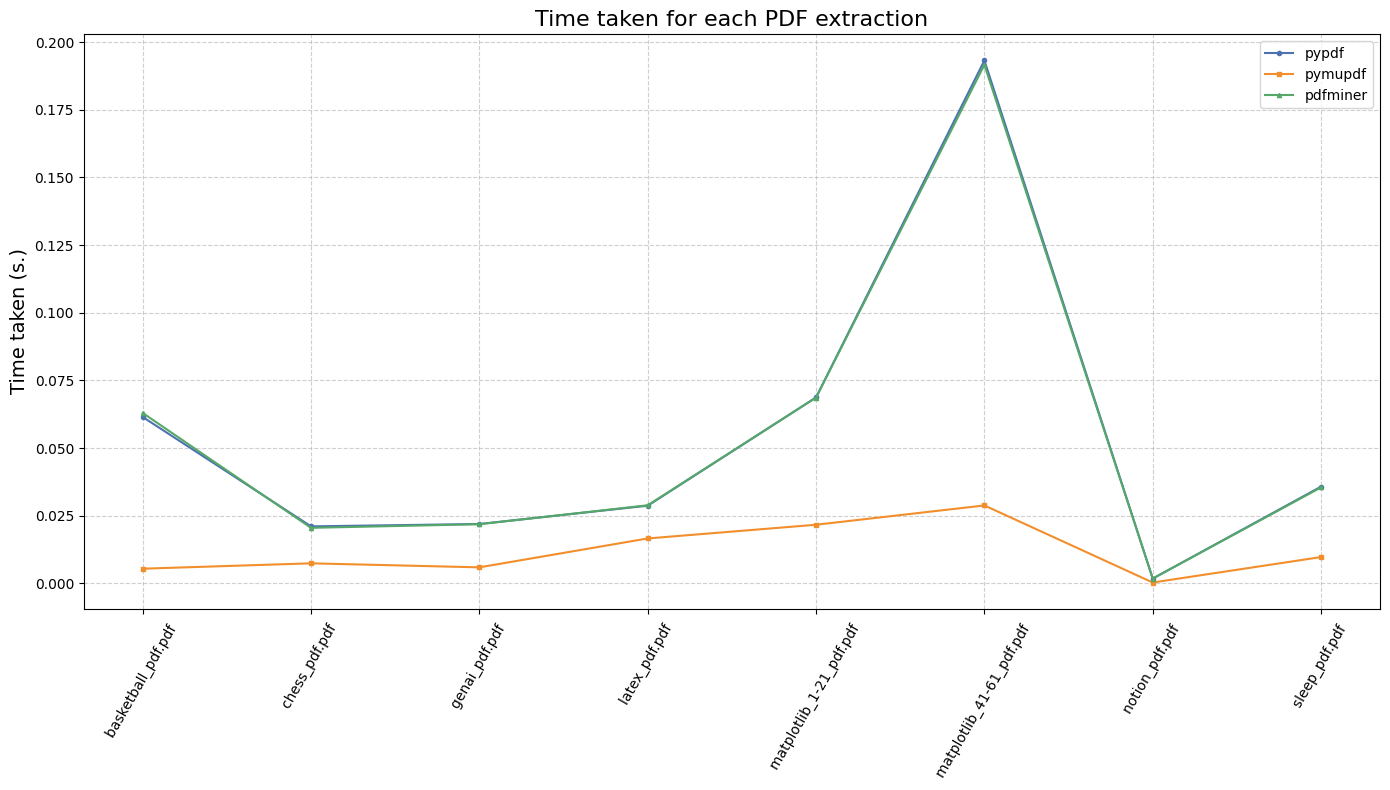

(<Figure size 1400x800 with 1 Axes>,
 <Axes: title={'center': 'Time taken for each PDF extraction'}, ylabel='Time taken (s.)'>)

In [22]:
plot_extraction_times(grouped_for_ext_time)

## Overall summary of Times

In [23]:
import numpy as np

In [24]:
data = {
    'pypdf': {
        'total_time(s)': 12,
        'speed (p/s)': 2
    }
}

In [25]:
data = {}
number_of_pages = df.shape[0]
for lib in libraries:
    column = f'{time_col_prefix}{lib}'
    total_time = df[column].sum()
    speed = number_of_pages / total_time

    data[lib] = {'total_time (s)': total_time, 'speed (p/s)': speed}

In [26]:
data

{'pypdf': {'total_time (s)': np.float64(0.43280363082885465),
  'speed (p/s)': np.float64(138.63099966397013)},
 'pymupdf': {'total_time (s)': np.float64(0.09605145454406426),
  'speed (p/s)': np.float64(624.6651889324028)},
 'pdfminer': {'total_time (s)': np.float64(0.4319446086883518),
  'speed (p/s)': np.float64(138.90669959325737)}}

In [27]:
def compare_pdf_libraries_time_summary(data: dict[str, dict[str, float]]) -> None:
    """
    Compare total time and speed for different PDF libraries.

    Args:
        data: dictionary containing time and speed metrics for each library.
    """
    libraries = list(data.keys())
    total_times = [data[lib]["total_time (s)"] for lib in libraries]
    speeds = [data[lib]["speed (p/s)"] for lib in libraries]

    fig, ax = plt.subplots(figsize=(10, 4))
    x = np.arange(len(libraries))
    width = 0.25  # Adjusted width for better spacing

    # Colors for the bars
    colors = {
        "Total Time (s)": "#FF6347",  # Tomato
        "Speed": "#32CD32",  # Lime Green
    }

    # Plotting the bars using the plot_data helper function
    plot_data(
        ax,
        x,
        total_times,
        plot_type="bar",
        label="Total Time (s)",
        color=colors["Total Time (s)"],
        width=width,
    )
    plot_data(
        ax,
        x + width,
        speeds,
        plot_type="bar",
        label="Speed",
        color=colors["Speed"],
        width=width,
    )
    
    ax.set_ylabel("Values", fontsize=12)
    ax.set_title(
        "Comparison of PDF Libraries: Total Time and Speed", fontsize=14
    )

    ax.set_xticks(x)
    ax.set_xticklabels(libraries)
    ax.legend()

    # Annotating the bars with the values
    def add_annotations(bars, data_list) -> None:
        """Helper function to add annotations on bars."""
        for bar, value in zip(bars, data_list):
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                yval,
                f"{value:.2f}",
                ha="center",
                va="bottom",
                color="black",
            )

    # Adding annotations
    add_annotations(ax.patches[: len(total_times)], total_times)
    add_annotations(ax.patches[len(total_times) : ], speeds)
    
    plt.tight_layout()
    plt.show()

    return fig, ax

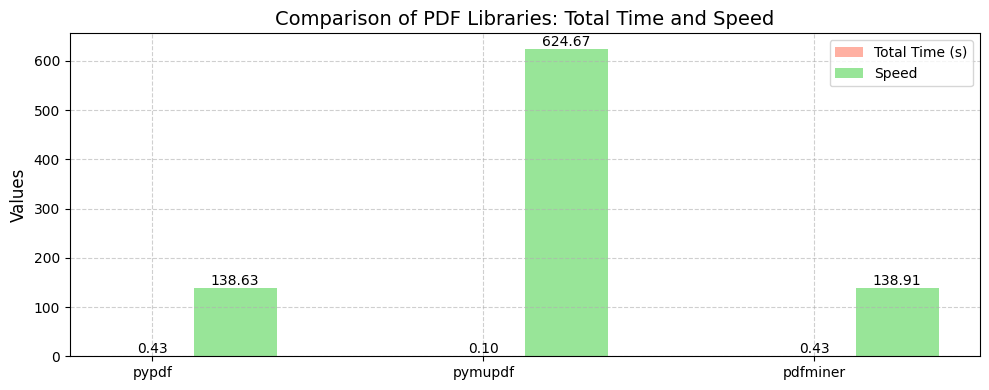

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Comparison of PDF Libraries: Total Time and Speed'}, ylabel='Values'>)

In [28]:
compare_pdf_libraries_time_summary(data)

# Key Observations:

1. For the given set of PDFs, pypdf and pymupdf have similar extraction times.
2. pymupdf is far superior in terms of speed, especially offering a linear increase in time as number of pages increase.
3. Per the last graph, pymupdf on average is 5x faster than either pypdf or pdfminer.
4. If the extraction quality is close to either of them, we have a clear winner.

## Metric Visualizations

In [29]:
df.sample(5)

,pageNumber_pypdf,pdfId_pypdf,pageContent_pypdf,extractionTimeSeconds_pypdf,pageContent_pymupdf,extractionTimeSeconds_pymupdf,pageContent_pdfminer,extractionTimeSeconds_pdfminer,pdfId,text,pypdf_bleu,pypdf_jaccard,pypdf_levenshtein,pymupdf_bleu,pymupdf_jaccard,pymupdf_levenshtein,pdfminer_bleu,pdfminer_jaccard,pdfminer_levenshtein,pdfName
58,2.0,genai_pdf.pdf ~ 2,Author: Prateek Mannem \n \n 3 \n \n• Recog...,0.009166,Author: Prateek Mannem \n \n \n \n3\n \n• Reco...,0.002321,Author: Prateek Mannem \n \n 3 \n \n• Recog...,0.008765,genai_pdf.pdf ~ 2,\nWhat Exactly is Generative AI? 🤖✨ \n\nThink ...,0.005680,0.098712,888,0.005680,0.098712,887,0.005680,0.098712,888,genai_pdf.pdf
28,1.0,basketball_pdf.pdf ~ 1,FromPeachBasketstoGlobalPhenomenon\nThestorybe...,0.025892,From Peach Baskets to Global Phenomenon\nThe s...,0.002699,FromPeachBasketstoGlobalPhenomenon\nThestorybe...,0.026867,basketball_pdf.pdf ~ 1,\nThe Global Game: Basketball's Unifying Power...,0.000000,0.000000,1526,0.056001,0.097046,1712,0.000000,0.000000,1526,basketball_pdf.pdf
13,14.0,matplotlib_41-61_pdf.pdf ~ 14,"Matplotlib, Release 2.0.2\n0.0 0.5 1.0\nx-labe...",0.004890,"Matplotlib, Release 2.0.2\n0.0\n0.5\n1.0\nx-la...",0.000876,"Matplotlib, Release 2.0.2\n0.0 0.5 1.0\nx-labe...",0.004844,matplotlib_41-61_pdf.pdf ~ 14,"\nMatplotlib, Release 2.0.2\n 2.0 1.5 1.0\n...",0.093624,0.176471,450,0.098870,0.202381,459,0.093624,0.176471,450,matplotlib_41-61_pdf.pdf
10,11.0,matplotlib_41-61_pdf.pdf ~ 11,"Matplotlib, Release 2.0.2\n0.0 0.5 1.0\nx-labe...",0.005978,"Matplotlib, Release 2.0.2\n0.0\n0.5\n1.0\nx-la...",0.000807,"Matplotlib, Release 2.0.2\n0.0 0.5 1.0\nx-labe...",0.004916,matplotlib_41-61_pdf.pdf ~ 11,"\nMatplotlib, Release 2.0.2\n 2.0\n1.5\n1.0...",0.097639,0.206897,280,0.097407,0.245614,277,0.097639,0.206897,280,matplotlib_41-61_pdf.pdf
8,9.0,matplotlib_41-61_pdf.pdf ~ 9,"Matplotlib, Release 2.0.2\n0.0 0.5 1.0\nx-labe...",0.003796,"Matplotlib, Release 2.0.2\n0.0\n0.5\n1.0\nx-la...",0.000612,"Matplotlib, Release 2.0.2\n0.0 0.5 1.0\nx-labe...",0.003109,matplotlib_41-61_pdf.pdf ~ 9,"\nTo prevent this, the location of axes needs ...",0.052848,0.193182,395,0.052848,0.193182,395,0.052848,0.193182,395,matplotlib_41-61_pdf.pdf


In [30]:
libraries

['pypdf', 'pymupdf', 'pdfminer']

In [31]:
bleu_score = df.groupby('pdfName').agg(
    {
        'pypdf_bleu': 'sum',
        'pymupdf_bleu': 'sum',
        'pdfminer_bleu': 'sum'
    }
)

In [32]:
df[['pypdf_bleu', 'pypdf_jaccard', 'pypdf_levenshtein']].describe()

,pypdf_bleu,pypdf_jaccard,pypdf_levenshtein
count,60.000000,60.000000,60.000000
mean,0.037324,0.098183,907.300000
std,0.096079,0.103812,589.603897
min,0.000000,0.000000,23.000000
25%,0.000049,0.013304,472.000000
50%,0.011823,0.094066,806.500000
75%,0.040723,0.137875,1292.750000
max,0.721087,0.676768,2716.000000


In [33]:
bleu_score

,pypdf_bleu,pymupdf_bleu,pdfminer_bleu
pdfName,,,
basketball_pdf.pdf,0.000062,0.401529,0.000062
chess_pdf.pdf,0.077802,0.077802,0.077802
genai_pdf.pdf,0.061873,0.061873,0.061873
latex_pdf.pdf,0.103517,0.058838,0.103517
matplotlib_1-21_pdf.pdf,0.853763,0.897502,0.853763
matplotlib_41-61_pdf.pdf,1.008460,1.022096,1.008460
notion_pdf.pdf,0.000876,0.000781,0.000876
sleep_pdf.pdf,0.133104,0.133104,0.133104


In [34]:
plot_extraction_times?

Signature:
plot_extraction_times(
    grouped_df: pandas.core.frame.DataFrame,
    libraries: list[str] = ['pypdf', 'pymupdf', 'pdfminer'],
    time_col_prefix: str = 'extractionTimeSeconds_',
    figsize: tuple[int, int] = (14, 8),
    colors: dict[str, str] = None,
    markers: dict[str, str] = None,
) -> None
Docstring: <no docstring>
File:      /var/folders/2x/q_38__5j1mgfk3pqv0vrxb5m0000gp/T/ipykernel_9846/1593483627.py
Type:      function

In [44]:
def plot_bleu(
    grouped_df: pd.DataFrame,
    libraries: list[str] = ['pypdf', 'pymupdf', 'pdfminer'],
    time_col_suffix: str = None,
    figsize: tuple[int, int] = (14, 8),
    type: str = 'line',
    colors: dict[str, str] = None,
    markers: dict[str, str] = None
) -> None:
    fig, ax = plt.subplots(figsize=figsize)

    default_colors = ['#4C72B0', '#F28E2B', '#55A868', '#8C564B', '#D62728']
    default_markers = ['o', 's', '^', 'D', 'v', 'p']

    if colors is None:
        colors = {
            i: default_colors[i % len(default_colors)]
            for i, lib in enumerate(libraries)
        }

    if markers is None:
        markers = {
            i: default_markers[i % len(default_markers)]
            for i, lib in enumerate(libraries)
        }
    if type == 'line':
        for i, library in enumerate(libraries):
            column = f'{library}_{time_col_suffix}'
            plot_data(
                ax, 
                grouped_df.index,
                grouped_df[column],
                plot_type='line',
                label=library,
                color=colors[i],
                marker=markers[i]
            )

        ax.set_title('Line Graph of Bleu Scores', fontsize=16)
        ax.set_ylabel('Score (bleu)', fontsize=14)
        ax.tick_params(axis='x', rotation=60)
    if type:
        plt.tight_layout()
    plt.show()

    return fig, ax

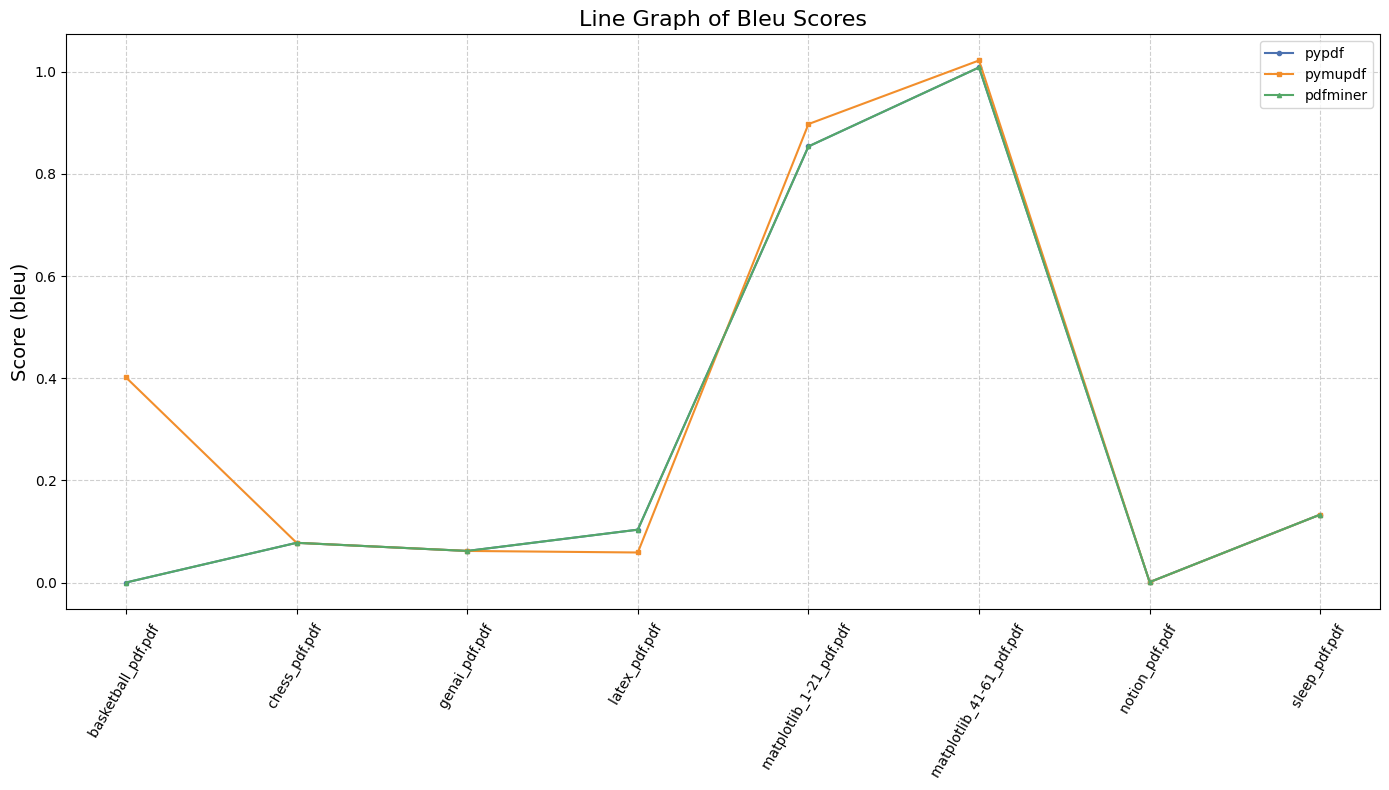

(<Figure size 1400x800 with 1 Axes>,
 <Axes: title={'center': 'Line Graph of Bleu Scores'}, ylabel='Score (bleu)'>)

In [45]:
plot_bleu(bleu_score, time_col_suffix='bleu')

In [37]:
def plot_empirical_cdf(df, metric_columns, title="Empirical CDF of Metrics", label_column=None):
    """
    Plots empirical CDFs for multiple metric columns.

    Parameters:
    - df: pd.DataFrame, the input data (one row per PDF, one column per metric).
    - metric_columns: list of str, the column names for the metrics to plot.
    - title: str, title of the plot.
    - label_column: optional str, if you want to label or sort by a specific column (ignored for plotting).
    """
    plt.figure(figsize=(10, 6))

    for col in metric_columns:
        sorted_vals = np.sort(df[col].dropna().values)
        cdf_vals = np.arange(1, len(sorted_vals)+1) / len(sorted_vals)
        plt.plot(sorted_vals, cdf_vals, marker='o', linestyle='-', label=col)

    plt.xlabel("Metric Value")
    plt.ylabel("Cumulative Probability (CDF)")
    plt.title(title)
    plt.grid(True)
    plt.yticks(np.arange(0, 1.05, 0.05))  # Y-ticks every 0.1
    plt.legend(title="Metric")
    plt.tight_layout()
    plt.show()


In [38]:
jaccard_similarity = df.groupby('pdfName').agg(
    {
        'pypdf_jaccard': 'sum',
        'pymupdf_jaccard': 'sum',
        'pdfminer_jaccard': 'sum',
    }
)

In [39]:
levenschtein_distance = df.groupby('pdfName').agg(
    {
        'pypdf_levenshtein': 'sum',
        'pymupdf_levenshtein': 'sum',
        'pdfminer_levenshtein': 'sum'
    }
)

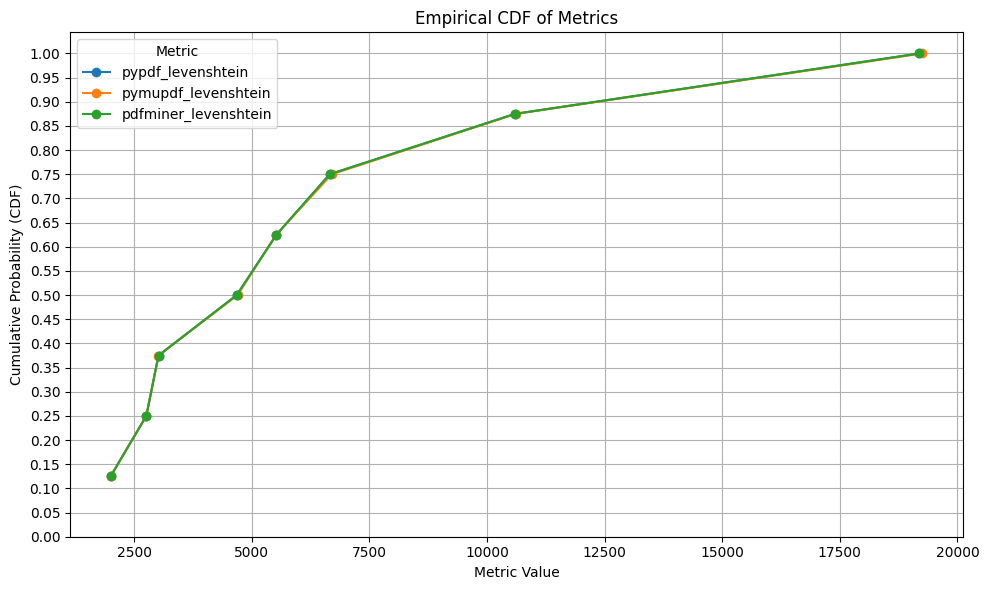

In [40]:
plot_empirical_cdf(levenschtein_distance, metric_columns=list(levenschtein_distance.columns))

In [41]:
def plot_violin_from_metrics(df, metric_columns, title="Violin Plot of Jaccard Scores"):
    """
    Plots a violin plot comparing the distributions of several metrics (e.g., Jaccard scores)
    across different PDF parsers.

    Parameters:
        df (pd.DataFrame): DataFrame containing one row per PDF and columns for each parser's metric.
        metric_columns (list): List of column names representing different parsers (metrics).
        title (str): Title of the plot.
    """
    # Melt the dataframe into long format for seaborn
    melted_df = df[metric_columns].melt(var_name="Parser", value_name="Jaccard Score")

    # Create the violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=melted_df, x="Parser", y="Jaccard Score", inner="box", palette="Set2")

    # Add titles and labels
    plt.title(title)
    plt.ylabel("Jaccard Score")
    plt.xlabel("PDF Parser")
    plt.ylim(0, 1)  # assuming scores are between 0 and 1
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [42]:
def plot_heatmap(df, title="Heatmap of Scores", fmt=".2f", cmap="YlGnBu"):
    """
    Plots a cleaner and more readable heatmap from the provided DataFrame.

    Parameters:
    - df: pd.DataFrame, data to plot
    - title: str, title of the heatmap
    - fmt: str, string formatting code (e.g., ".2f", "d", "e")
    - cmap: str or matplotlib colormap, color scheme
    """
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(
        df,
        annot=True,
        fmt=fmt,
        cmap=cmap,
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={"shrink": 0.7},
        annot_kws={"size": 9},
        square=False
    )
    ax.set_title(title, fontsize=14, pad=12)
    ax.set_xlabel("Parser", fontsize=12)
    ax.set_ylabel("PDF File", fontsize=12)
    plt.xticks(rotation=30, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


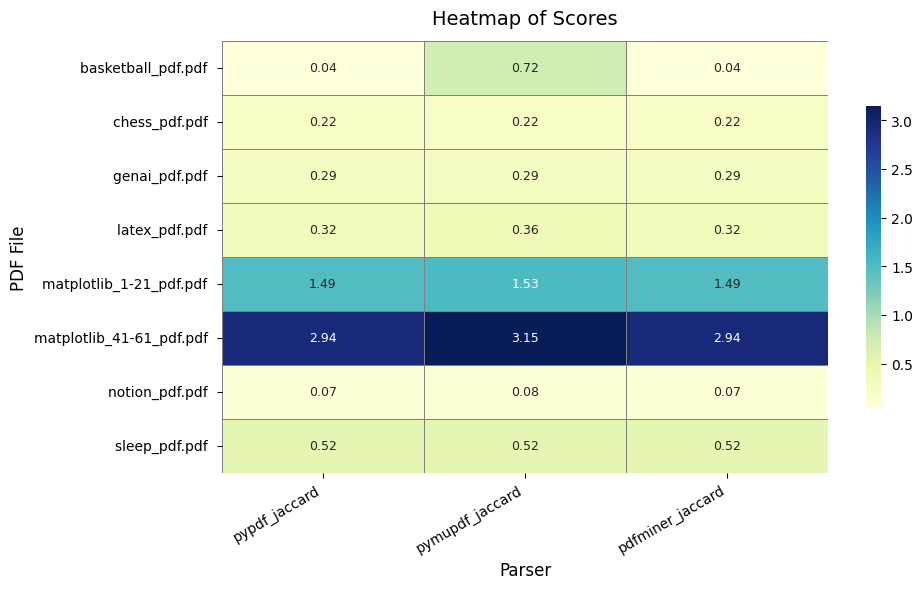

In [48]:
plot_heatmap(jaccard_similarity)

## 1. Line Graph - BLEU Score
The logic of BLEU score is that the closer the BLEU score is to 1, the better it is. Throughout the majoriity of the line graph, and at the peak of the different lines, pymupdf was the closest to 1 than the other libraries, which means that, from this metric, it was the most accurate.

## 2. Levenschtein distance - Cumalitive Density Function
The logic of levenschtein distance is that basically the higher the number, the less accurate it is, because the levenschtein distance is the number of operations needed to transform one string into another--in this case, the number of characters that are needed to change the extracted to the original. However, in the Cumalitive Density Function, there is a very significant overlap, and there isn't much distinction between the lines, so there is not a lot of information the graph can give us in terms of the difference in accuracy between the libraries.

## 3. Heatmap - Jaccard Simililarity
The logic of Jaccard similiarity is that the higher the similarity, the closer the PDFs are to each other; the value is between 0 and 1. This heatmap shows the distribution of the Jaccard scores. As shown, the colors are almost exactly the same, which means that each of the values for the libraries are almos the same. However, if you look at the numbers themselves, we can see that pymupdf's jaccard scores are higher than the others. Therefore, Jaccard similiarity is telling us that pymupdf is the most accurate. 

---

# Conclusion
We looked at three graphs for three metrics to see which pdf parsing library is the most accurate and reliable, and the majority of the graphs showed that pymupdf had the most accurate extractions in comparison to the ground truth. 
Therefore, we can say that pymupdf is the most accurate and reliable pdf parsing library out of our three options.

---